### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

- 自变量：一组测试数据颜色和文字是是否一致
- 因变量：一组测试中完成的时间

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- 零假设：颜色、文字一致和不一致完成时间的总体差异均值相等  
- 对立假设：颜色、文字一致和不一致完成时间的总体差异均值不相等

$ H_0: \mu_{diff} = 0$ **(观察颜色、文字不一致和一致完成时间的差异的总体平均值等于0)**  
$ H_1: \mu_{diff} \neq 0 $ **(观察颜色、文字不一致和一致完成时间的差异的总体平均值不等于0)**

**选用T检验，因为T检验适用于小样本量的检验而本项目的数据集的大小是24所以属于小样本量，试验中的数据不可以满足T检验中独立样本的要求，因为“每位参与者必须全部完成并记录每种条件下使用的时间。”这其中包括一位参数者会观察一致和不一致两种情况，所以使用双尾配对T检验**

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.rc('font', family='SimHei', size=13)

df = pd.read_csv('./stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [2]:
def diff_():
    """通过函数获取观察颜色、文字一致的完成时间和不一致完成时间的样本差异样本"""
    diff = []
    for value in df.values:
        Congruent = value[0]
        Incongruent = value[1]
        diff.append(Congruent - Incongruent)
    return diff

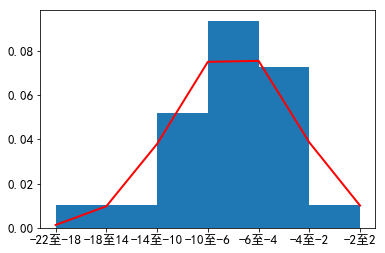

In [3]:
diff = diff_()
ind = ['-22至-18', '-18至14', '-14至-10', '-10至-6', '-6至-4', '-4至-2', '-2至2']
cut = np.array(range(-22, 4, 4))
diff = np.array(diff)
mu = diff.mean()
sigma = diff.std(ddof=1)
count, bins, ignored = plt.hist(diff, bins=cut, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.xticks(bins, ind);

**通过观察差异样本的图表发现，观察颜色、文字一致和不一致完成的时间比较符合正太分布**

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [4]:
### 得到样本的大小
size = df.shape[0]
### 计算t值
T = diff.mean() / (sigma / np.sqrt(size))

## 自由度为n-1
DF = size - 1

print('T-Value is: {}\ndf is: {}' .format(T, DF))

T-Value is: -8.020706944109957
df is: 23


### 结论
**设置95%的置信水平**  
**通过T-Value表得到自由度为23和显著性水平$\alpha$为0.05的双尾T临界值为：$\pm$2.069**  
[获取P—Value](https://www.graphpad.com/quickcalcs/pValue1/)  
**通过t值和df自由度查询t值表得到双尾P-Value为：0.0001，但实际上P-Value会比0.0001小，因为查到的P-Value可能是一个近似值，它并不严格等于0.0001 **    
**而T-Value是-8.020706944109957明显在临界区内，所以是具有显著性的**  
**再通过比较P-Values和显著水平$\alpha$可以看出$P-Value < \alpha$**  
**所以在此确认我的对立假设是具有显著统计意义的，可以肯定的说我成功的拒绝了零假设。**  

**因为在文字和颜色一致的时候我们的反应是很快的，但是当文字和颜色不一致的时候我们需要通过判读的时间反而增加了反应时间，所以得到的结果就是当颜色和文字不一致的时候所用的时间会更长一些，通过以上的统计意义可以确定这一点。**